In [10]:
%matplotlib inline
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
import time

In [11]:
myclient=pymongo.MongoClient("mongodb://localhost:27017/")
myStatsCol=myclient['STATS']['Events']
myWhoCol=myclient['whoScored']['Events']

In [12]:
def plot_field() :
    """This function will allow us to print the field to better understand the heatmap"""
    #Create figure
    fig=plt.figure()
    fig.set_size_inches(10, 8)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,100], color="black")
    plt.plot([0,100],[100,100], color="black")
    plt.plot([100,100],[100,0], color="black")
    plt.plot([100,0],[0,0], color="black")
    plt.plot([50,50],[0,100], color="black")

    #Left Penalty Area
    plt.plot([17,17],[78.9,21.1],color="black")
    plt.plot([0,17],[78.9,78.9],color="black")
    plt.plot([17,0],[21.1,21.1],color="black")

    #Right Penalty Area
    plt.plot([100,83],[78.9,78.9],color="black")
    plt.plot([83,83],[78.9,21.1],color="black")
    plt.plot([83,100],[21.1,21.1],color="black")

    #Left 6-yard Box
    plt.plot([0,5.8],[63.2,63.2],color="black")
    plt.plot([5.8,5.8],[63.2,36.8],color="black")
    plt.plot([5.8,0],[36.8,36.8],color="black")

    #Right 6-yard Box
    plt.plot([100,94.2],[63.2,63.2],color="black")
    plt.plot([94.2,94.2],[63.2,36.8],color="black")
    plt.plot([94.2,100],[36.8,36.8],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
    centreSpot = plt.Circle((50,50),0.8,color="black")
    leftPenSpot = plt.Circle((11.5,50),0.8,color="black")
    rightPenSpot = plt.Circle((88.5,50),0.8,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11.5,50),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((88.5,50),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Tidy Axes
    plt.axis('on')

    #Explanation Of the Field 
    plt.xlabel('Defense ----------------------------------------------------------------------------------------------------------------------> Attack')


In [26]:
def get_player_heatmap(player_id,game_id,provider) :
    """will provide a heatmap for player_id in his n games and return his centroid"""
    if provider=='STATS' :
        myCol=myStatsCol
        points=[]
        #x goes to 105 and y goes to 70 so we have to put them in a good format.
        for k in myclient['STATS']['Events'].find({'gameId':game_id,'playerId':player_id}):
            if 'x' in k and 'y' in k and k!=None :
                tmp=myclient['STATS']['Events'].find_one({'gameId':game_id,'period':k['period'],'teamId':k['teamId'],'$or':[{'typeId':75},{'typeId':79}]})
                x=k['x']/105*100
                y=k['y']/70*100
                if tmp!=None and tmp['x']<50 :
                    y=100-y
                elif tmp!=None and tmp['x']>50:
                    x=100-x
                points.append([x,y])
    else:
        myCol=myWhoCol
        points=[]
        for k in myCol.find({'gameId':i,'playerId':player_id}):
            if 'x' in k and 'y' in k and k!=None :
                points.append([k['x'],k['y']])
    points=np.array(points)
    #plot the field 
    plot_field()
    #show the heatmap
    sns.kdeplot(points[:,0],points[:,1] ,shade=True,shade_lowest=False,color='red')  
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.show()
    return points.mean(0)

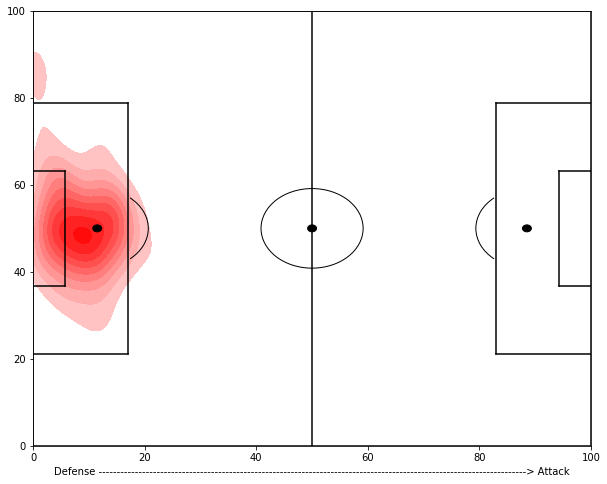

array([ 8.94596041, 51.54093098])

In [27]:
get_player_heatmap(373844.0,1546784,'STATS')

In [15]:
myclient['STATS']['playerPlayingEvent'].find_one()

{'_id': '373844_1546784',
 'playerId': 373844,
 'isStarting': 1,
 'minPlayed': 95.383333333,
 'subbedIn': 0,
 'subbedOut': 0,
 'RedCard': 0,
 'line': 1,
 'side': 'home',
 'teamId': 6157,
 'gameId': 1546784,
 'competitionId': 39,
 'seasonId': 2015,
 'formation': '4231',
 'key': '373844_1546784',
 'gameDate': datetime.datetime(2015, 8, 8, 11, 45),
 'validData': True}